In [1]:
import pandas as pd 
import numpy as np

In [2]:
data_raw = pd.read_excel("data.xlsx")
weights = data_raw[["Weight"]]
scenarios = data_raw.drop(columns = ["Weight", "Unnamed: 36"])

In [3]:
from entropy_pooling import views

(A,b,C,d) = views.load();

     pcost       dcost       gap    pres   dres
 0: -1.9348e+00 -1.9350e+00  2e-04  0e+00  7e-01
 1: -1.9348e+00 -1.9348e+00  2e-06  1e-19  7e-03
 2: -1.9348e+00 -1.9348e+00  2e-08  1e-19  2e-04
 3: -1.9348e+00 -1.9348e+00  5e-10  1e-19  1e-05
 4: -1.9348e+00 -1.9348e+00  6e-12  1e-19  8e-08
Optimal solution found.
   Global Equities  DM Equities
0         0.002926     0.005525
Assetit European Equities Global Equities
Assetit EM Equities European Equities


In [4]:
from entropy_pooling import entropy_minimizer
c = 0.5
p = np.array(weights)
m,n = p.shape

posterior = entropy_minimizer.full_confidence_posterior(p, A,b,C,d)
weighted_posterior = entropy_minimizer.confidence_weighted_posterior(p, posterior, c)

Results
Optimal dual variable values:  [ 1.19608340e+03  8.16961028e+00 -9.38559158e-01  3.61656034e+01
 -8.83789437e+00]
Jacobian matrix at optimum [-0.004761   -0.4033505  -0.39924672  0.01759662 -0.47671203]


EUR Money Markets: 29.5% 
EUR Government Bonds: 56.6% 
EUR Investment Grade Corporate Bonds: 13.6% 
EMD Hard Currency: 0.3% 


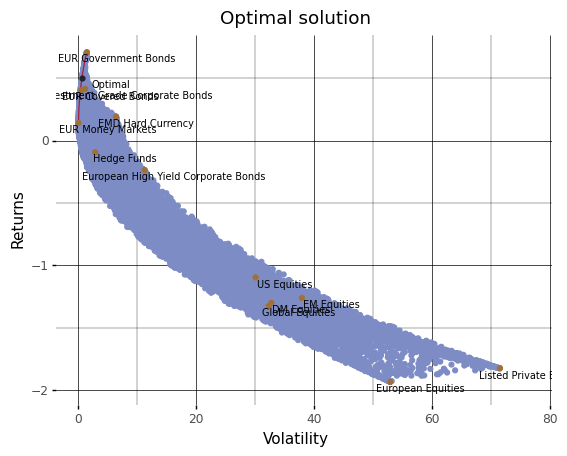

In [5]:
from entropy_pooling import markoviz_optimizer
optimal_x = markoviz_optimizer.optimizer(scenarios.iloc[:,0:13], weighted_posterior, mu_0 = 0.5, disp = False, visualize = True).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(scenarios.iloc[:,0:13].columns):
  if optimal_x[i] > 0.001:
    print("{}: {}% ".format(col, np.round(optimal_x[i]*100,decimals = 1)))

US Equities: 17.2%
EUR Government Bonds: 48.9%
EMD Hard Currency: 33.8%


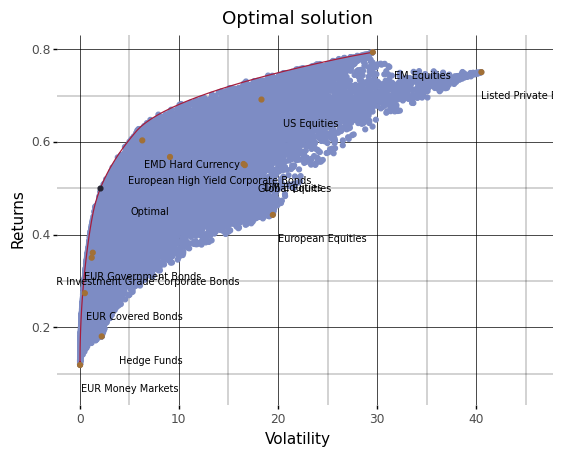

In [6]:
from entropy_pooling import markoviz_optimizer
optimal_x = markoviz_optimizer.optimizer(scenarios.iloc[:,0:13], weights, mu_0 = 0.5, disp = False, visualize = True).x
np.round(optimal_x, decimals = 2)
for i, col in enumerate(scenarios.iloc[:,0:13].columns):
  if optimal_x[i] > 0.001:
    print("{}: {}%".format(col, np.round(optimal_x[i]*100,decimals = 1)))